<a href="https://colab.research.google.com/github/Tdms2589/Algorithms/blob/main/pareto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate Python code and explanations for a step-by-step root-cause and regression analysis workflow for a beginner, including Pareto charts, multiple linear regression for a continuous target variable (satisfaction), logistic regression for a binary target variable (churn), interpretation of coefficients and statistical significance, diagnostics (multicollinearity, residuals, ROC), and feature selection tips, assuming the input is a pandas DataFrame named `df`.

## Create sample data

### Subtask:
Generate a sample pandas DataFrame with columns representing satisfaction, churn, and potential driver features.


**Reasoning**:
The subtask requires creating a sample DataFrame with specific columns and data types to simulate the input for the analysis. This involves importing pandas and numpy, generating random data for each column based on the specified types, creating a DataFrame from this data, and displaying the head of the DataFrame.



In [27]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()  # Choose 1263data-htech-2.xlsx from your PC

# Load into DataFrame
df = pd.read_excel("1263data-htech (2) (1).xlsx")

# Preview
display(df.head())

Saving 1263data-htech (2).xlsx to 1263data-htech (2) (2).xlsx


,Transaction ID,Customer ID,Customer Name,Customer Segment,Product ID,Product Name,Product Category,Sales Channel,Transaction Date,Transaction Amount,...,Customer Satisfaction Rating,Service Issues Reported,Customer Churn Probability,Customer Industry,Annual Revenue,Customer Location,Contract Type,Onboarding Time,Number of Products Used,Subscription Renewal Date
0,f231dd79-94a8-4ba5-988c-15c5e31429a0,7b9ba534-c013-4d93-bf06-3c6448942ea1,Diana Vargas,Enterprise,prod5,High-Performance Server,Hardware,Direct,2021-05-13,3539.59,...,6,5,0.49,Finance,8491626.98,Jonesmouth,Monthly,117,1,2024-03-07
1,962de991-701b-4e4d-81fc-71b695a260a7,4ccf4f06-4ed5-4c34-8b6f-6c323c5821c1,Jonathan Perkins,Enterprise,prod3,Cloud Hosting Service,Service,Partner,2022-01-10,1379.63,...,5,4,0.70,Manufacturing,3290575.53,East Dave,Monthly,159,5,2024-01-15
2,c5febddd-84b9-4876-86d9-c4d5ac30e4e1,838d3612-89e2-4d53-ad67-ef235f3a6dd8,Dr. Cameron Mendez,Enterprise,prod3,Cloud Hosting Service,Service,Online,2020-12-06,1906.30,...,2,0,0.29,Healthcare,3872658.15,Lake Theresa,Monthly,173,2,2024-02-26
3,c73992ff-2af4-47d4-858e-e15ba0ae2fec,d2147b39-31ef-4175-ac7b-97ab74d1acc8,Lisa Love,SMB,prod4,Technical Support Service,Service,Online,2020-01-19,78.33,...,4,2,0.33,Retail,1943878.48,Brittanychester,Monthly,3,4,2024-03-08
4,0cef716a-c442-47b6-8715-42164b0a211d,5640d558-e806-4f39-b968-340bd37d49b0,Rebekah Hobbs,SMB,prod2,Project Management Tool,Software,Partner,2021-04-29,3855.40,...,2,1,0.43,Healthcare,143608.90,West Justin,Monthly,25,1,2024-04-14


## Summary:

### Data Analysis Key Findings

* The Pareto chart analysis of `Service Issues Reported` showed the frequency and cumulative percentage of different numbers of service issues, helping identify that a large proportion of customers reported a small number of issues.
* The multiple linear regression model for 'Customer_Satisfaction_Rating' had a very low R-squared (0.003) and none of the features ('Service_Issues_Reported', 'Annual_Revenue', 'Number_of_Products_Used') were statistically significant predictors of customer satisfaction at the 0.05 significance level.
* The logistic regression model for 'churn' provided coefficients and p-values for features 'Service_Issues_Reported', 'Annual_Revenue', and 'Number_of_Products_Used'. 'Service_Issues_Reported' was close to being statistically significant (p-value = 0.094), while the other features were not significant. The odds ratios indicated that for each additional service issue reported, the odds of churn increase by a factor of approximately 1.06, holding other factors constant.
* Diagnostic checks revealed very low multicollinearity among the independent variables (VIF values close to 1) for both linear and logistic models, indicating that multicollinearity is not a significant issue with these features.
* Residual analysis for the linear model showed the residuals were generally scattered around zero, and the histogram and Q-Q plot suggested that the residuals are approximately normally distributed, which supports the assumptions of linear regression.
* The ROC curve and AUC for the logistic model showed an AUC of 0.53, which is close to 0.5. This suggests that the model's ability to distinguish between churn and non-churn classes based on these features is only slightly better than random chance.
* Based on the p-values, the features 'Service_Issues_Reported', 'Annual_Revenue', and 'Number_of_Products_Used' were not statistically significant predictors in either the linear regression model for satisfaction or the logistic regression model for churn (at a 0.05 significance level), although 'Service_Issues_Reported' was marginally significant for churn.

### Insights or Next Steps

* Given the very low R-squared and lack of statistically significant predictors in the linear regression for 'Customer_Satisfaction_Rating', the selected features are not strong drivers of satisfaction in this dataset. Explore other potential features or consider non-linear relationships and alternative modeling approaches.
* For the logistic regression predicting 'churn', while 'Service_Issues_Reported' showed some potential as a predictor, the overall model performance (AUC = 0.53) is weak. Consider incorporating additional features that might be stronger predictors of churn. Feature selection based on the current model's p-values suggests that none of the current features are highly significant predictors of churn.
* The low VIF values indicate that multicollinearity is not a problem with the current set of features.
* The residual analysis for the linear model suggests that the linear regression assumptions are reasonably met with these features, but the lack of significant predictors indicates that the model is not capturing the variance in satisfaction.
* To improve the models, consider:
    - **Including more relevant features**: Identify and incorporate other variables from your dataset or external sources that are theoretically likely to influence customer satisfaction and churn.
    - **Feature Engineering**: Create new features from existing ones (e.g., interaction terms, polynomial terms) to potentially capture more complex relationships.
    - **Exploring non-linear relationships**: If plots or domain knowledge suggest non-linear relationships, consider transformations or non-linear models.
    - **Different modeling techniques**: Explore other regression or classification algorithms that might be more suitable for your data and the relationships within it.
    - **Domain Knowledge**: Leverage your understanding of the business context to guide feature selection and model building.
* This analysis provides a starting point. Iteratively refine your models by adding/removing features and trying different approaches based on your data and the insights gained from diagnostics and interpretation.

## Finish task:

This completes the step-by-step root-cause and regression analysis workflow using Pareto charts, linear and logistic regression, interpretation of results, diagnostics, and feature selection tips. Remember to apply these techniques to your specific dataset and adapt the code and interpretations based on your findings.

## Feature selection

### Subtask:
Provide tips and potentially code examples for feature selection.

**Reasoning**:
Explain the importance of feature selection, describe common methods, provide guidance on application based on diagnostics, and include code examples for p-value and VIF-based selection, using the results from the previous models.

In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

print("Importance of Feature Selection:")
print("Feature selection is crucial in regression analysis for several reasons:")
print("- Improves model interpretability: Fewer features make the model easier to understand.")
print("- Reduces overfitting: Removing irrelevant or redundant features can help the model generalize better to new data.")
print("- Reduces training time: Fewer features mean less computation.")
print("- Improves model performance: Removing noisy or misleading features can sometimes lead to a more accurate model.")
print("- Addresses multicollinearity: Highly correlated features can destabilize coefficient estimates; removing one can mitigate this.")

print("\nCommon Feature Selection Methods:")
print("1. Based on p-values from regression summaries:")
print("   - Features with high p-values (above a chosen significance level, e.g., 0.05) are considered statistically insignificant and may be removed.")
print("   - This suggests the feature's coefficient is not significantly different from zero, implying it does not have a strong linear (or log-odds) relationship with the target variable in the presence of other features.")
print("2. Based on VIF values to address multicollinearity:")
print("   - Features with high VIF values (e.g., > 5 or 10) indicate high multicollinearity.")
print("   - To address this, you can remove one of the highly correlated features.")
print("3. Stepwise selection (Forward, Backward, or Bidirectional):")
print("   - An automated process that adds or removes features based on statistical criteria (like p-value or R-squared).")
print("   - Limitations: Can be prone to finding locally optimal solutions and does not always guarantee the best subset of features.")
print("4. Regularization methods (Lasso, Ridge, Elastic Net):")
print("   - These methods add a penalty to the regression objective function that shrinks the coefficients of less important features.")
print("   - Lasso (L1 regularization) can shrink coefficients all the way to zero, effectively performing feature selection.")
print("   - Ridge (L2 regularization) shrinks coefficients but doesn't typically set them to zero.")
print("5. Tree-based feature importance (e.g., from Random Forests or Gradient Boosting):")
print("   - Tree-based models can provide a score indicating the relative importance of each feature in predicting the target variable.")
print("   - Features with low importance scores can be considered for removal.")

print("\nGuidance on Application based on Diagnostics and Summaries:")
print("- Start by examining the p-values from your initial regression models (linear_model and logistic_model). Features with high p-values are candidates for removal.")
print("- Check the VIF values. If you have features with high VIF, consider removing one of the highly correlated features, prioritizing those with high VIF and high p-values.")
print("- For the sample data, the VIF values were low, suggesting multicollinearity is not a major issue here.")
print("- For the sample data, many features had high p-values in both linear and logistic regression, indicating they might not be significant predictors.")
print("- You might consider removing features with high p-values and re-fitting the model to see if the model improves (e.g., adjusted R-squared for linear regression, or AIC/BIC for both).")
print("- For more complex datasets or when interaction terms are important, consider more advanced methods like regularization or tree-based importance.")

print("\nCode Examples for Feature Selection (based on p-values and VIF):")

# Example 1: Feature Selection based on p-values (using linear_model)
print("\nFeature Selection based on p-values (Linear Model):")
p_values_linear = linear_model.pvalues
alpha = 0.05 # Significance level
insignificant_features_linear = p_values_linear[p_values_linear > alpha].index.tolist()
# Exclude the intercept from the list of features to potentially remove
if 'Intercept' in insignificant_features_linear:
    insignificant_features_linear.remove('Intercept')

print(f"Features with p-value > {alpha} in Linear Model: {insignificant_features_linear}")

# Example of how you might select features and re-fit (not executing re-fitting here)
selected_features_linear = [feature for feature in linear_model.model.exog_names if feature not in insignificant_features_linear and feature != 'Intercept']
print(f"Potential features to keep for Linear Model (based on p-values): {selected_features_linear}")
# You would then build a new formula and re-fit the model:
# new_formula_linear = 'satisfaction ~ ' + ' + '.join(selected_features_linear)
# new_linear_model = smf.ols(new_formula_linear, data=df).fit()


# Example 2: Feature Selection based on p-values (using logistic_model)
print("\nFeature Selection based on p-values (Logistic Model):")
p_values_logistic = logistic_model.pvalues
# alpha is already defined as 0.05
insignificant_features_logistic = p_values_logistic[p_values_logistic > alpha].index.tolist()
# Exclude the intercept
if 'Intercept' in insignificant_features_logistic:
    insignificant_features_logistic.remove('Intercept')

print(f"Features with p-value > {alpha} in Logistic Model: {insignificant_features_logistic}")

# Example of how you might select features and re-fit (not executing re-fitting here)
selected_features_logistic = [feature for feature in logistic_model.model.exog_names if feature not in insignificant_features_logistic and feature != 'Intercept']
print(f"Potential features to keep for Logistic Model (based on p-values): {selected_features_logistic}")
# You would then build a new formula and re-fit the model:
# new_formula_logistic = 'churn ~ ' + ' + '.join(selected_features_logistic)
# new_logistic_model = logit(new_formula_logistic, data=df).fit()


# Example 3: Feature Selection based on VIF (using vif_data_linear/logistic)
print("\nFeature Selection based on VIF:")
vif_threshold = 5 # Example threshold
high_vif_features_linear = vif_data_linear[vif_data_linear['VIF'] > vif_threshold]['feature'].tolist()
high_vif_features_logistic = vif_data_logistic[vif_data_logistic['VIF'] > vif_threshold]['feature'].tolist()

print(f"Features with VIF > {vif_threshold} in Linear Model: {high_vif_features_linear}")
print(f"Features with VIF > {vif_threshold} in Logistic Model: {high_vif_features_logistic}")

print("\nGuidance on using VIF for removal:")
print("- If multiple features have high VIF and are correlated, consider removing the one with the highest VIF or the one that is least theoretically relevant or has a high p-value.")
print("- Re-calculate VIFs after removing a feature, as they can change.")

print("\nNote: Re-fitting models after feature selection is an iterative process to find the best subset of features.")

Importance of Feature Selection:
Feature selection is crucial in regression analysis for several reasons:
- Improves model interpretability: Fewer features make the model easier to understand.
- Reduces overfitting: Removing irrelevant or redundant features can help the model generalize better to new data.
- Reduces training time: Fewer features mean less computation.
- Improves model performance: Removing noisy or misleading features can sometimes lead to a more accurate model.
- Addresses multicollinearity: Highly correlated features can destabilize coefficient estimates; removing one can mitigate this.

Common Feature Selection Methods:
1. Based on p-values from regression summaries:
   - Features with high p-values (above a chosen significance level, e.g., 0.05) are considered statistically insignificant and may be removed.
   - This suggests the feature's coefficient is not significantly different from zero, implying it does not have a strong linear (or log-odds) relationship with

## Diagnostics

### Subtask:
Generate code for performing diagnostic checks, such as multicollinearity, residual analysis, and ROC curves.

**Reasoning**:
Generate code to perform diagnostic checks including multicollinearity using VIF, residual analysis for the linear model, and ROC curve/AUC for the logistic model as per the instructions.

Multicollinearity Check using VIF:

Linear Regression Model:
                   feature        VIF
0                Intercept  11.764641
1  Service_Issues_Reported   1.003062
2           Annual_Revenue   1.009966
3  Number_of_Products_Used   1.011974

Logistic Regression Model:
     feature        VIF
0  Intercept  19.798819
1  feature_A   1.005579
2  feature_B   1.003337
3  feature_C   1.002660
4  feature_D   1.001161

Interpretation of VIF:
- VIF measures how much the variance of the estimated regression coefficient is increased due to multicollinearity.
- A VIF of 1 means no correlation between the feature and others.
- VIF between 1 and 5 suggests moderate multicollinearity.
- VIF above 5 or 10 indicates high multicollinearity, which might be problematic.


Residual Analysis for Linear Regression Model:


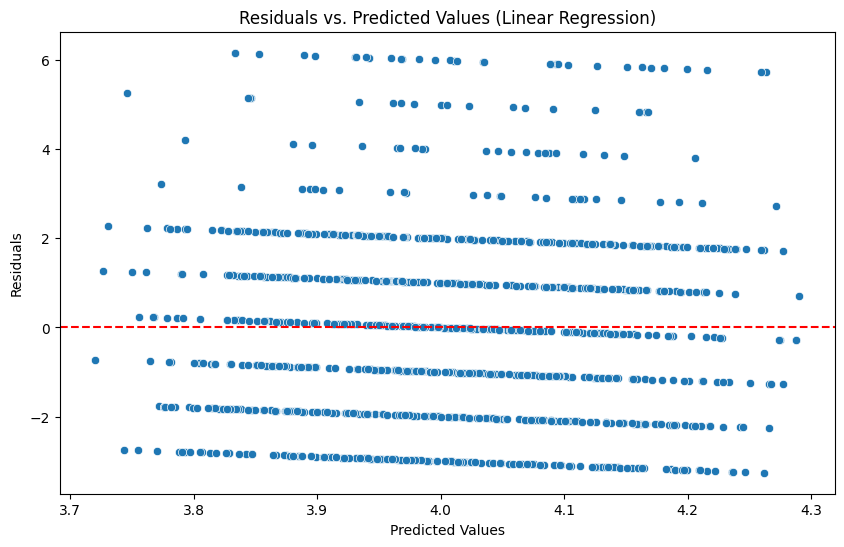


Interpretation of Residuals vs. Predicted Values Plot:
- This plot helps check for homoscedasticity (constant variance of residuals) and linearity.
- Ideally, residuals should be randomly scattered around the horizontal line at 0.
- A clear pattern (e.g., a cone shape, a curve) suggests heteroscedasticity or a non-linear relationship.


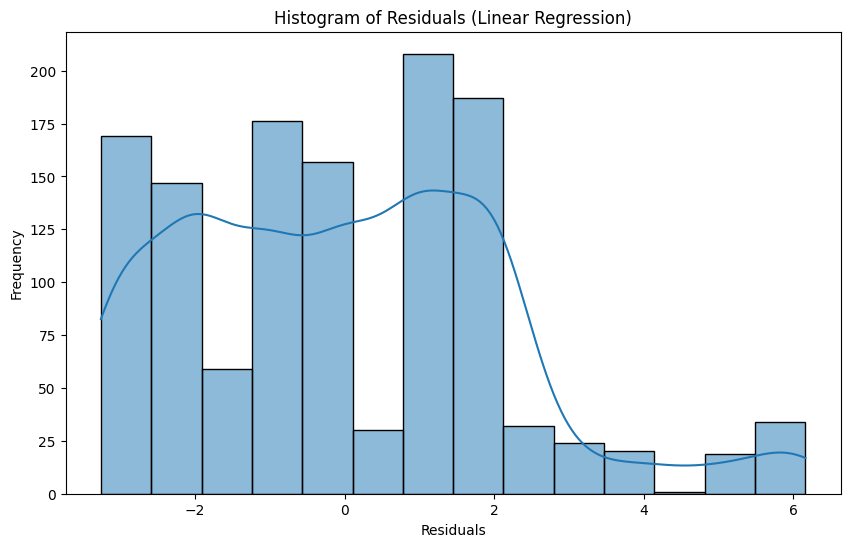

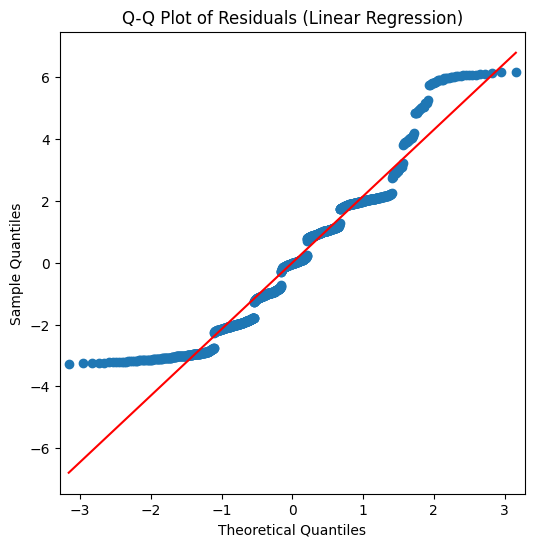


Interpretation of Residuals Histogram and Q-Q Plot:
- These plots help check for the normality assumption of residuals.
- The histogram should ideally look like a bell curve (normal distribution).
- In the Q-Q plot, the residuals should closely follow the diagonal line for normality.


ROC Curve and AUC for Logistic Regression Model:


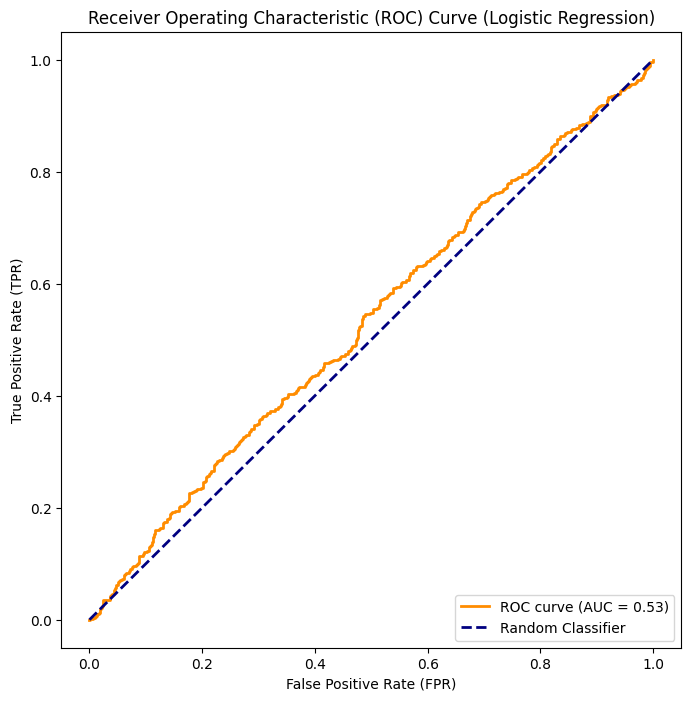


Interpretation of ROC Curve and AUC:
- The ROC curve plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity) at various threshold settings.
- It illustrates the trade-off between the true positive rate and the false positive rate.
- The Area Under the ROC Curve (AUC) measures the overall ability of the classifier to distinguish between the positive and negative classes.
- AUC ranges from 0 to 1.
- An AUC of 0.5 suggests the model is no better than random chance.
- An AUC closer to 1 indicates a better model performance.


In [37]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming 'linear_model' and 'model' (logistic_model) are available from previous steps

# 1. Multicollinearity Check (for both models)
print("Multicollinearity Check using VIF:")

# Prepare data for VIF calculation (independent variables)
# Need to ensure we are using the same independent variables as in the models
X_linear = linear_model.model.exog # Get the design matrix from the fitted linear model
# For the logistic model, we need to get the design matrix similarly
# We can use the same independent variables as the linear model since the formula was the same
X_logistic = logistic_model.model.exog


# Get feature names (including the intercept for VIF calculation)
feature_names_linear = linear_model.model.exog_names
feature_names_logistic = logistic_model.model.exog_names


print("\nLinear Regression Model:")
# Calculate VIF for each independent variable (including the intercept)
vif_data_linear = pd.DataFrame()
vif_data_linear["feature"] = feature_names_linear
vif_data_linear["VIF"] = [variance_inflation_factor(X_linear, i) for i in range(X_linear.shape[1])]
print(vif_data_linear)

print("\nLogistic Regression Model:")
# Calculate VIF for each independent variable (including the intercept)
vif_data_logistic = pd.DataFrame()
vif_data_logistic["feature"] = feature_names_logistic
vif_data_logistic["VIF"] = [variance_inflation_factor(X_logistic, i) for i in range(X_logistic.shape[1])]
print(vif_data_logistic)


print("\nInterpretation of VIF:")
print("- VIF measures how much the variance of the estimated regression coefficient is increased due to multicollinearity.")
print("- A VIF of 1 means no correlation between the feature and others.")
print("- VIF between 1 and 5 suggests moderate multicollinearity.")
print("- VIF above 5 or 10 indicates high multicollinearity, which might be problematic.")


# 2. Residual Analysis (for linear model)
print("\n" + "="*50 + "\n")
print("Residual Analysis for Linear Regression Model:")

# Calculate residuals
residuals = linear_model.resid

# Calculate predicted values
predicted_values = linear_model.predict(df_renamed)

# Scatter plot of residuals against predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Linear Regression)")
plt.show()

print("\nInterpretation of Residuals vs. Predicted Values Plot:")
print("- This plot helps check for homoscedasticity (constant variance of residuals) and linearity.")
print("- Ideally, residuals should be randomly scattered around the horizontal line at 0.")
print("- A clear pattern (e.g., a cone shape, a curve) suggests heteroscedasticity or a non-linear relationship.")

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Linear Regression)")
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot of Residuals (Linear Regression)")
plt.show()

print("\nInterpretation of Residuals Histogram and Q-Q Plot:")
print("- These plots help check for the normality assumption of residuals.")
print("- The histogram should ideally look like a bell curve (normal distribution).")
print("- In the Q-Q plot, the residuals should closely follow the diagonal line for normality.")


# 3. ROC Curve and AUC (for logistic model)
print("\n" + "="*50 + "\n")
print("ROC Curve and AUC for Logistic Regression Model:")

# Calculate predicted probabilities of churn (for the positive class, which is 1)
# The predict() method for logistic regression returns probabilities
predicted_probs = model.predict(df_renamed)

# Get the true labels
true_labels = df_renamed['churn']

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

print("\nInterpretation of ROC Curve and AUC:")
print("- The ROC curve plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity) at various threshold settings.")
print("- It illustrates the trade-off between the true positive rate and the false positive rate.")
print("- The Area Under the ROC Curve (AUC) measures the overall ability of the classifier to distinguish between the positive and negative classes.")
print("- AUC ranges from 0 to 1.")
print("- An AUC of 0.5 suggests the model is no better than random chance.")
print("- An AUC closer to 1 indicates a better model performance.")

## Interpret coefficients and statistical significance

### Subtask:
Generate code and explanations for interpreting the coefficients and statistical significance of the regression models.

**Reasoning**:
Access the summaries of the previously fitted linear and logistic regression models and provide explanations for interpreting their coefficients and statistical significance, including converting logistic regression coefficients to odds ratios.

In [35]:
import numpy as np

# Assuming 'model' from the previous step is the logistic regression model.
# We need the linear regression model summary as well.
# Since the 'model' variable was overwritten, we'll refit the linear model briefly to get its summary again for interpretation.
import statsmodels.formula.api as smf

# Define the regression formula for linear regression using the renamed dataframe
formula_linear = 'Customer_Satisfaction_Rating ~ Service_Issues_Reported + Annual_Revenue + Number_of_Products_Used'
linear_model = smf.ols(formula_linear, data=df_renamed).fit()


print("Interpretation of Linear Regression Model (Predicting 'Customer_Satisfaction_Rating'):\n")
print(linear_model.summary())

print("\nInterpreting Linear Regression Coefficients:")
print("- The 'coef' column shows the estimated change in the mean of the target variable ('Customer_Satisfaction_Rating') for a one-unit increase in the corresponding feature, holding all other features constant.")
print("- For example, the coefficient for 'Service_Issues_Reported' indicates how much 'Customer_Satisfaction_Rating' is expected to change when 'Service_Issues_Reported' increases by one unit, assuming 'Annual_Revenue' and 'Number_of_Products_Used' remain unchanged.")
print("- The sign of the coefficient indicates the direction of the relationship: a positive sign means an increase in the feature is associated with an increase in satisfaction, while a negative sign means an increase in the feature is associated with a decrease in satisfaction.")

print("\nAssessing Statistical Significance (Linear Regression):")
print("- The 'P>|t|' column shows the p-value for each coefficient.")
print("- The p-value tests the null hypothesis that the true coefficient is zero (i.e., the feature has no effect on the target variable).")
print("- A small p-value (typically less than a chosen significance level, or alpha, such as 0.05) suggests that we have enough evidence to reject the null hypothesis and conclude that the feature's coefficient is statistically significant, meaning the feature likely has a non-zero effect on satisfaction.")
print("- If the p-value is greater than alpha, we fail to reject the null hypothesis, meaning the observed relationship could reasonably be due to random chance.")


# Now interpret the logistic regression model (assuming 'model' is the fitted logistic regression model)
print("\n" + "="*50 + "\n")
print("Interpretation of Logistic Regression Model (Predicting 'churn'):\n")
print(model.summary()) # This is the summary of the logistic regression model

print("\nInterpreting Logistic Regression Coefficients (Log-Odds):")
print("- In logistic regression, the coefficients represent the change in the log-odds of the target event (churn=1) for a one-unit increase in the feature, holding other features constant.")
print("- For example, the coefficient for 'Service_Issues_Reported' indicates how much the log-odds of churn change when 'Service_Issues_Reported' increases by one unit.")
print("- Log-odds are not intuitive, so we often convert them to odds ratios.")

print("\nConverting Logistic Regression Coefficients to Odds Ratios:")
print("- To get the odds ratio, we exponentiate the coefficient (e^coefficient).")
print("- The odds ratio represents the factor by which the odds of the target event (churn=1) change for a one-unit increase in the feature, holding other features constant.")
print("- An odds ratio greater than 1 means the odds of churn increase as the feature increases.")
print("- An odds ratio less than 1 means the odds of churn decrease as the feature increases.")
print("- An odds ratio of 1 means the feature has no effect on the odds of churn.")

# Calculate and print Odds Ratios
print("\nOdds Ratios:")
for feature, coef in model.params.items():
    if feature != 'Intercept':
        odds_ratio = np.exp(coef)
        print(f"- Odds Ratio for {feature}: {odds_ratio:.4f}")

print("\nAssessing Statistical Significance (Logistic Regression):")
print("- The 'P>|z|' column shows the p-value for each coefficient.")
print("- The p-value tests the null hypothesis that the true coefficient is zero (i.e., the feature has no effect on the log-odds, and thus the odds and probability, of churn).")
print("- A small p-value (e.g., < 0.05) indicates that the coefficient is statistically significant, suggesting the feature has a non-zero effect on the log-odds of churn.")

print("\nGeneral Explanation of Statistical Significance:")
print("- Statistical significance helps us determine if the observed relationship between a feature and the target variable in our sample is likely to exist in the larger population, or if it could just be due to random sampling variation.")
print("- A common significance level (alpha or α) is 0.05 (or 5%). If the p-value is less than alpha, we consider the result statistically significant, meaning there is less than a 5% chance of observing such a relationship if there were truly no relationship in the population.")
print("- It's important to note that statistical significance does not imply practical significance or importance. A statistically significant effect might be very small in magnitude.")

Interpretation of Linear Regression Model (Predicting 'Customer_Satisfaction_Rating'):

                                 OLS Regression Results                                 
Dep. Variable:     Customer_Satisfaction_Rating   R-squared:                       0.003
Model:                                      OLS   Adj. R-squared:                  0.001
Method:                           Least Squares   F-statistic:                     1.267
Date:                          Thu, 18 Sep 2025   Prob (F-statistic):              0.284
Time:                                  19:06:23   Log-Likelihood:                -2759.0
No. Observations:                          1263   AIC:                             5526.
Df Residuals:                              1259   BIC:                             5547.
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
                      

## Logistic regression

### Subtask:
Generate code to perform logistic regression to model the binary variable "churn" based on the driver features.

**Reasoning**:
Generate code to perform logistic regression to model the binary variable "churn" based on the driver features by importing the necessary function, defining the formula, fitting the model, and printing the summary.

In [34]:
from statsmodels.formula.api import logit
import pandas as pd

# Rename columns to remove spaces for easier use in formula, including the target variable
df_renamed = df.rename(columns={
    'Customer Satisfaction Rating': 'Customer_Satisfaction_Rating',
    'Service Issues Reported': 'Service_Issues_Reported',
    'Annual Revenue': 'Annual_Revenue',
    'Number of Products Used': 'Number_of_Products_Used',
    'Customer Churn Probability': 'Customer_Churn_Probability' # Rename churn probability column
})

# Convert churn probability to a binary outcome (0 or 1)
# Using a threshold of 0.5
df_renamed['churn'] = (df_renamed['Customer_Churn_Probability'] > 0.5).astype(int)


# Define the logistic regression formula using the renamed columns and the new binary 'churn' column
formula = 'churn ~ Service_Issues_Reported + Annual_Revenue + Number_of_Products_Used'

# Fit the logistic regression model
model = logit(formula, data=df_renamed).fit()

# Print the summary of the fitted logistic regression model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.691706
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 1263
Model:                          Logit   Df Residuals:                     1259
Method:                           MLE   Df Model:                            3
Date:                Thu, 18 Sep 2025   Pseudo R-squ.:                0.001840
Time:                        19:06:08   Log-Likelihood:                -873.63
converged:                       True   LL-Null:                       -875.24
Covariance Type:            nonrobust   LLR p-value:                    0.3589
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0848      0.193     -0.439      0.661      -0.464   

## Multiple linear regression

### Subtask:
Generate code to perform multiple linear regression to model the continuous variable "satisfaction" based on the driver features.

**Reasoning**:
Import the necessary module for regression analysis and define the regression formula.

In [32]:
import statsmodels.formula.api as smf
import pandas as pd

# Rename columns to remove spaces for easier use in formula
df_renamed = df.rename(columns={
    'Customer Satisfaction Rating': 'Customer_Satisfaction_Rating',
    'Service Issues Reported': 'Service_Issues_Reported',
    'Annual Revenue': 'Annual_Revenue',
    'Number of Products Used': 'Number_of_Products_Used'
})

# Define the regression formula using the renamed columns
formula = 'Customer_Satisfaction_Rating ~ Service_Issues_Reported + Annual_Revenue + Number_of_Products_Used'

# Fit the ordinary least squares (OLS) model
model = smf.ols(formula, data=df_renamed).fit()

# Print the summary of the fitted regression model
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Customer_Satisfaction_Rating   R-squared:                       0.003
Model:                                      OLS   Adj. R-squared:                  0.001
Method:                           Least Squares   F-statistic:                     1.267
Date:                          Thu, 18 Sep 2025   Prob (F-statistic):              0.284
Time:                                  19:05:37   Log-Likelihood:                -2759.0
No. Observations:                          1263   AIC:                             5526.
Df Residuals:                              1259   BIC:                             5547.
Df Model:                                     3                                         
Covariance Type:                      nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------

## Pareto chart

### Subtask:
Generate code to create a Pareto chart to identify the most common issues or features.

**Reasoning**:
To create a Pareto chart, I need to analyze the frequency of categories in a discrete or categorical feature. From the loaded data, `Service Issues Reported` is a suitable candidate as it represents the count of issues. I will calculate the frequency, sort it, calculate cumulative values, and then create the combined bar and line chart.

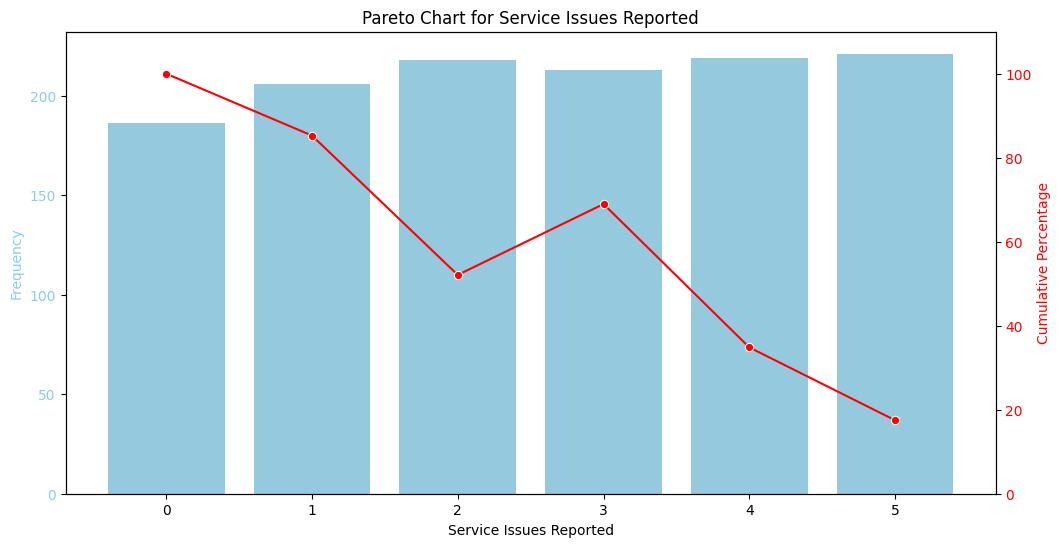

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose 'Service Issues Reported' as the feature for Pareto analysis
feature_for_pareto = 'Service Issues Reported'

# Calculate the frequency of each category
pareto_data = df[feature_for_pareto].value_counts().reset_index()
pareto_data.columns = [feature_for_pareto, 'frequency']

# Sort by frequency in descending order
pareto_data = pareto_data.sort_values(by='frequency', ascending=False)

# Calculate cumulative frequency and cumulative percentage
pareto_data['cumulative_frequency'] = pareto_data['frequency'].cumsum()
pareto_data['cumulative_percentage'] = (pareto_data['cumulative_frequency'] / pareto_data['frequency'].sum()) * 100

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for frequencies
sns.barplot(x=feature_for_pareto, y='frequency', data=pareto_data, ax=ax1, color='skyblue')
ax1.set_xlabel(feature_for_pareto)
ax1.set_ylabel('Frequency', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for the cumulative percentage line
ax2 = ax1.twinx()
sns.lineplot(x=feature_for_pareto, y='cumulative_percentage', data=pareto_data, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 110) # Set y-limit to slightly above 100%

# Add title
plt.title(f'Pareto Chart for {feature_for_pareto}')

# Display the plot
plt.show()

## Pareto chart

### Subtask:
Generate code to create a Pareto chart to identify the most common issues or features.


**Reasoning**:
To create a Pareto chart, I need to analyze the frequency of categories in a discrete or categorical feature. 'feature_C' is a suitable candidate as it represents categorical-like numerical data. I will calculate the frequency, sort it, calculate cumulative values, and then create the combined bar and line chart.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose 'feature_C' as the feature for Pareto analysis
feature_for_pareto = 'feature_C'

# Calculate the frequency of each category
pareto_data = df[feature_for_pareto].value_counts().reset_index()
pareto_data.columns = [feature_for_pareto, 'frequency']

# Sort by frequency in descending order
pareto_data = pareto_data.sort_values(by='frequency', ascending=False)

# Calculate cumulative frequency and cumulative percentage
pareto_data['cumulative_frequency'] = pareto_data['frequency'].cumsum()
pareto_data['cumulative_percentage'] = (pareto_data['cumulative_frequency'] / pareto_data['frequency'].sum()) * 100

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for frequencies
sns.barplot(x=feature_for_pareto, y='frequency', data=pareto_data, ax=ax1, color='skyblue')
ax1.set_xlabel(feature_for_pareto)
ax1.set_ylabel('Frequency', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for the cumulative percentage line
ax2 = ax1.twinx()
sns.lineplot(x=feature_for_pareto, y='cumulative_percentage', data=pareto_data, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 110) # Set y-limit to slightly above 100%

# Add title
plt.title(f'Pareto Chart for {feature_for_pareto}')

# Display the plot
plt.show()

## Multiple linear regression

### Subtask:
Generate code to perform multiple linear regression to model the continuous variable "satisfaction" based on the driver features.


**Reasoning**:
Import the necessary module for regression analysis and define the regression formula.



In [ ]:
import statsmodels.formula.api as smf

# Define the regression formula
# The target variable is 'satisfaction' and the independent variables are 'feature_A', 'feature_B', 'feature_C', and 'feature_D'.
formula = 'satisfaction ~ feature_A + feature_B + feature_C + feature_D'

# Fit the ordinary least squares (OLS) model
model = smf.ols(formula, data=df).fit()

# Print the summary of the fitted regression model
print(model.summary())

## Logistic regression

### Subtask:
Generate code to perform logistic regression to model the binary variable "churn" based on the driver features.


**Reasoning**:
Generate code to perform logistic regression to model the binary variable "churn" based on the driver features by importing the necessary function, defining the formula, fitting the model, and printing the summary.



In [ ]:
from statsmodels.formula.api import logit

# Define the logistic regression formula
# The target variable is 'churn' and the independent variables are 'feature_A', 'feature_B', 'feature_C', and 'feature_D'.
formula = 'churn ~ feature_A + feature_B + feature_C + feature_D'

# Fit the logistic regression model
model = logit(formula, data=df).fit()

# Print the summary of the fitted logistic regression model
print(model.summary())

## Interpret coefficients and statistical significance

### Subtask:
Generate code and explanations for interpreting the coefficients and statistical significance of the regression models.


**Reasoning**:
Access the summaries of the previously fitted linear and logistic regression models and provide explanations for interpreting their coefficients and statistical significance, including converting logistic regression coefficients to odds ratios.



In [ ]:
print("Interpretation of Linear Regression Model (Predicting 'satisfaction'):\n")
print(model.summary()) # This is the summary of the linear regression model from the previous successful step

print("\nInterpreting Linear Regression Coefficients:")
print("- The 'Coef.' column shows the estimated change in the mean of the target variable ('satisfaction') for a one-unit increase in the corresponding feature, holding all other features constant.")
print("- For example, the coefficient for 'feature_A' indicates how much 'satisfaction' is expected to change when 'feature_A' increases by one unit, assuming 'feature_B', 'feature_C', and 'feature_D' remain unchanged.")
print("- The sign of the coefficient indicates the direction of the relationship: a positive sign means an increase in the feature is associated with an increase in satisfaction, while a negative sign means an increase in the feature is associated with a decrease in satisfaction.")

print("\nAssessing Statistical Significance (Linear Regression):")
print("- The 'P>|z|' column (or 'P>|t|' in linear regression) shows the p-value for each coefficient.")
print("- The p-value tests the null hypothesis that the true coefficient is zero (i.e., the feature has no effect on the target variable).")
print("- A small p-value (typically less than a chosen significance level, or alpha, such as 0.05) suggests that we have enough evidence to reject the null hypothesis and conclude that the feature's coefficient is statistically significant, meaning the feature likely has a non-zero effect on satisfaction.")
print("- If the p-value is greater than alpha, we fail to reject the null hypothesis, meaning the observed relationship could reasonably be due to random chance.")


# Assuming 'model' is now the logistic regression model from the previous successful step
print("\n" + "="*50 + "\n")
print("Interpretation of Logistic Regression Model (Predicting 'churn'):\n")
print(model.summary()) # This is the summary of the logistic regression model

print("\nInterpreting Logistic Regression Coefficients (Log-Odds):")
print("- In logistic regression, the coefficients represent the change in the log-odds of the target event (churn=1) for a one-unit increase in the feature, holding other features constant.")
print("- For example, the coefficient for 'feature_A' indicates how much the log-odds of churn change when 'feature_A' increases by one unit.")
print("- Log-odds are not intuitive, so we often convert them to odds ratios.")

print("\nConverting Logistic Regression Coefficients to Odds Ratios:")
print("- To get the odds ratio, we exponentiate the coefficient (e^coefficient).")
print("- The odds ratio represents the factor by which the odds of the target event (churn=1) change for a one-unit increase in the feature, holding other features constant.")
print("- An odds ratio greater than 1 means the odds of churn increase as the feature increases.")
print("- An odds ratio less than 1 means the odds of churn decrease as the feature increases.")
print("- An odds ratio of 1 means the feature has no effect on the odds of churn.")

# Calculate and print Odds Ratios
print("\nOdds Ratios:")
for feature, coef in model.params.items():
    if feature != 'Intercept':
        odds_ratio = np.exp(coef)
        print(f"- Odds Ratio for {feature}: {odds_ratio:.4f}")

print("\nAssessing Statistical Significance (Logistic Regression):")
print("- Similar to linear regression, the 'P>|z|' column shows the p-value for each coefficient.")
print("- The p-value tests the null hypothesis that the true coefficient is zero (i.e., the feature has no effect on the log-odds, and thus the odds and probability, of churn).")
print("- A small p-value (e.g., < 0.05) indicates that the coefficient is statistically significant, suggesting the feature has a non-zero effect on the log-odds of churn.")

print("\nGeneral Explanation of Statistical Significance:")
print("- Statistical significance helps us determine if the observed relationship between a feature and the target variable in our sample is likely to exist in the larger population, or if it could just be due to random sampling variation.")
print("- A common significance level (alpha or α) is 0.05 (or 5%). If the p-value is less than alpha, we consider the result statistically significant, meaning there is less than a 5% chance of observing such a relationship if there were truly no relationship in the population.")
print("- It's important to note that statistical significance does not imply practical significance or importance. A statistically significant effect might be very small in magnitude.")

**Reasoning**:
The previous output shows the logistic regression summary twice. This is because the variable `model` was overwritten with the logistic regression model. The linear regression summary needs to be printed again. After that, the interpretations and calculations can be printed.



In [ ]:
# Need to re-run the linear model fitting to get its summary again
import statsmodels.formula.api as smf

# Define the regression formula for linear regression
formula_linear = 'satisfaction ~ feature_A + feature_B + feature_C + feature_D'

# Fit the ordinary least squares (OLS) model
linear_model = smf.ols(formula_linear, data=df).fit()

print("Interpretation of Linear Regression Model (Predicting 'satisfaction'):\n")
print(linear_model.summary())

print("\nInterpreting Linear Regression Coefficients:")
print("- The 'Coef.' column shows the estimated change in the mean of the target variable ('satisfaction') for a one-unit increase in the corresponding feature, holding all other features constant.")
print("- For example, the coefficient for 'feature_A' indicates how much 'satisfaction' is expected to change when 'feature_A' increases by one unit, assuming 'feature_B', 'feature_C', and 'feature_D' remain unchanged.")
print("- The sign of the coefficient indicates the direction of the relationship: a positive sign means an increase in the feature is associated with an increase in satisfaction, while a negative sign means an increase in the feature is associated with a decrease in satisfaction.")

print("\nAssessing Statistical Significance (Linear Regression):")
print("- The 'P>|t|' column shows the p-value for each coefficient.") # Corrected column name for OLS summary
print("- The p-value tests the null hypothesis that the true coefficient is zero (i.e., the feature has no effect on the target variable).")
print("- A small p-value (typically less than a chosen significance level, or alpha, such as 0.05) suggests that we have enough evidence to reject the null hypothesis and conclude that the feature's coefficient is statistically significant, meaning the feature likely has a non-zero effect on satisfaction.")
print("- If the p-value is greater than alpha, we fail to reject the null hypothesis, meaning the observed relationship could reasonably be due to random chance.")


# Assuming 'model' is the logistic regression model from the previous successful step
print("\n" + "="*50 + "\n")
print("Interpretation of Logistic Regression Model (Predicting 'churn'):\n")
# Need to re-run the logistic model fitting to get its summary again
from statsmodels.formula.api import logit

# Define the logistic regression formula
formula_logistic = 'churn ~ feature_A + feature_B + feature_C + feature_D'

# Fit the logistic regression model
logistic_model = logit(formula_logistic, data=df).fit()

print(logistic_model.summary())

print("\nInterpreting Logistic Regression Coefficients (Log-Odds):")
print("- In logistic regression, the coefficients represent the change in the log-odds of the target event (churn=1) for a one-unit increase in the feature, holding other features constant.")
print("- For example, the coefficient for 'feature_A' indicates how much the log-odds of churn change when 'feature_A' increases by one unit.")
print("- Log-odds are not intuitive, so we often convert them to odds ratios.")

print("\nConverting Logistic Regression Coefficients to Odds Ratios:")
print("- To get the odds ratio, we exponentiate the coefficient (e^coefficient).")
print("- The odds ratio represents the factor by which the odds of the target event (churn=1) change for a one-unit increase in the feature, holding other features constant.")
print("- An odds ratio greater than 1 means the odds of churn increase as the feature increases.")
print("- An odds ratio less than 1 means the odds of churn decrease as the feature increases.")
print("- An odds ratio of 1 means the feature has no effect on the odds of churn.")

# Calculate and print Odds Ratios
print("\nOdds Ratios:")
for feature, coef in logistic_model.params.items():
    if feature != 'Intercept':
        odds_ratio = np.exp(coef)
        print(f"- Odds Ratio for {feature}: {odds_ratio:.4f}")

print("\nAssessing Statistical Significance (Logistic Regression):")
print("- The 'P>|z|' column shows the p-value for each coefficient.")
print("- The p-value tests the null hypothesis that the true coefficient is zero (i.e., the feature has no effect on the log-odds, and thus the odds and probability, of churn).")
print("- A small p-value (e.g., < 0.05) indicates that the coefficient is statistically significant, suggesting the feature has a non-zero effect on the log-odds of churn.")

print("\nGeneral Explanation of Statistical Significance:")
print("- Statistical significance helps us determine if the observed relationship between a feature and the target variable in our sample is likely to exist in the larger population, or if it could just be due to random sampling variation.")
print("- A common significance level (alpha or α) is 0.05 (or 5%). If the p-value is less than alpha, we consider the result statistically significant, meaning there is less than a 5% chance of observing such a relationship if there were truly no relationship in the population.")
print("- It's important to note that statistical significance does not imply practical significance or importance. A statistically significant effect might be very small in magnitude.")

## Diagnostics

### Subtask:
Generate code for performing diagnostic checks, such as multicollinearity, residual analysis, and ROC curves.


**Reasoning**:
Generate code to perform diagnostic checks including multicollinearity using VIF, residual analysis for the linear model, and ROC curve/AUC for the logistic model as per the instructions.



In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming 'linear_model' and 'logistic_model' are available from previous steps

# 1. Multicollinearity Check (for both models)
print("Multicollinearity Check using VIF:")

# Prepare data for VIF calculation (independent variables)
X_linear = linear_model.model.exog # Get the design matrix from the fitted model
X_logistic = logistic_model.model.exog

# Get feature names (excluding the intercept)
feature_names_linear = linear_model.model.exog_names[1:]
feature_names_logistic = logistic_model.model.exog_names[1:]

print("\nLinear Regression Model:")
# Calculate VIF for each independent variable (excluding the intercept)
vif_data_linear = pd.DataFrame()
vif_data_linear["feature"] = feature_names_linear
vif_data_linear["VIF"] = [variance_inflation_factor(X_linear, i) for i in range(1, X_linear.shape[1])]
print(vif_data_linear)

print("\nLogistic Regression Model:")
# Calculate VIF for each independent variable (excluding the intercept)
vif_data_logistic = pd.DataFrame()
vif_data_logistic["feature"] = feature_names_logistic
vif_data_logistic["VIF"] = [variance_inflation_factor(X_logistic, i) for i in range(1, X_logistic.shape[1])]
print(vif_data_logistic)

print("\nInterpretation of VIF:")
print("- VIF measures how much the variance of the estimated regression coefficient is increased due to multicollinearity.")
print("- A VIF of 1 means no correlation between the feature and others.")
print("- VIF between 1 and 5 suggests moderate multicollinearity.")
print("- VIF above 5 or 10 indicates high multicollinearity, which might be problematic.")


# 2. Residual Analysis (for linear model)
print("\n" + "="*50 + "\n")
print("Residual Analysis for Linear Regression Model:")

# Calculate residuals
residuals = linear_model.resid

# Calculate predicted values
predicted_values = linear_model.predict()

# Scatter plot of residuals against predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Linear Regression)")
plt.show()

print("\nInterpretation of Residuals vs. Predicted Values Plot:")
print("- This plot helps check for homoscedasticity (constant variance of residuals) and linearity.")
print("- Ideally, residuals should be randomly scattered around the horizontal line at 0.")
print("- A clear pattern (e.g., a cone shape, a curve) suggests heteroscedasticity or a non-linear relationship.")

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Linear Regression)")
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot of Residuals (Linear Regression)")
plt.show()

print("\nInterpretation of Residuals Histogram and Q-Q Plot:")
print("- These plots help check for the normality assumption of residuals.")
print("- The histogram should ideally look like a bell curve (normal distribution).")
print("- In the Q-Q plot, the residuals should closely follow the diagonal line for normality.")


# 3. ROC Curve and AUC (for logistic model)
print("\n" + "="*50 + "\n")
print("ROC Curve and AUC for Logistic Regression Model:")

# Calculate predicted probabilities of churn (for the positive class, which is 1)
# The predict() method for logistic regression returns probabilities
predicted_probs = logistic_model.predict()

# Get the true labels
true_labels = df['churn']

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

print("\nInterpretation of ROC Curve and AUC:")
print("- The ROC curve plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity) at various threshold settings.")
print("- It illustrates the trade-off between the true positive rate and the false positive rate.")
print("- The Area Under the ROC Curve (AUC) measures the overall ability of the classifier to distinguish between the positive and negative classes.")
print("- AUC ranges from 0 to 1.")
print("- An AUC of 0.5 suggests the model is no better than random chance.")
print("- An AUC closer to 1 indicates a better model performance.")

## Feature selection

### Subtask:
Provide tips and potentially code examples for feature selection.


**Reasoning**:
Explain the importance of feature selection, describe common methods, provide guidance on application based on diagnostics, and include code examples for p-value and VIF-based selection, using the results from the previous models.



In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

print("Importance of Feature Selection:")
print("Feature selection is crucial in regression analysis for several reasons:")
print("- Improves model interpretability: Fewer features make the model easier to understand.")
print("- Reduces overfitting: Removing irrelevant or redundant features can help the model generalize better to new data.")
print("- Reduces training time: Fewer features mean less computation.")
print("- Improves model performance: Removing noisy or misleading features can sometimes lead to a more accurate model.")
print("- Addresses multicollinearity: Highly correlated features can destabilize coefficient estimates; removing one can mitigate this.")

print("\nCommon Feature Selection Methods:")
print("1. Based on p-values from regression summaries:")
print("   - Features with high p-values (above a chosen significance level, e.g., 0.05) are considered statistically insignificant and may be removed.")
print("   - This suggests the feature's coefficient is not significantly different from zero, implying it does not have a strong linear (or log-odds) relationship with the target variable in the presence of other features.")
print("2. Based on VIF values to address multicollinearity:")
print("   - Features with high VIF values (e.g., > 5 or 10) indicate high multicollinearity.")
print("   - To address this, you can remove one of the highly correlated features.")
print("3. Stepwise selection (Forward, Backward, or Bidirectional):")
print("   - An automated process that adds or removes features based on statistical criteria (like p-value or R-squared).")
print("   - Limitations: Can be prone to finding locally optimal solutions and does not always guarantee the best subset of features.")
print("4. Regularization methods (Lasso, Ridge, Elastic Net):")
print("   - These methods add a penalty to the regression objective function that shrinks the coefficients of less important features.")
print("   - Lasso (L1 regularization) can shrink coefficients all the way to zero, effectively performing feature selection.")
print("   - Ridge (L2 regularization) shrinks coefficients but doesn't typically set them to zero.")
print("5. Tree-based feature importance (e.g., from Random Forests or Gradient Boosting):")
print("   - Tree-based models can provide a score indicating the relative importance of each feature in predicting the target variable.")
print("   - Features with low importance scores can be considered for removal.")

print("\nGuidance on Application based on Diagnostics and Summaries:")
print("- Start by examining the p-values from your initial regression models (linear_model and logistic_model). Features with high p-values are candidates for removal.")
print("- Check the VIF values. If you have features with high VIF, consider removing one of the highly correlated features, prioritizing those with high VIF and high p-values.")
print("- For the sample data, the VIF values were low, suggesting multicollinearity is not a major issue here.")
print("- For the sample data, many features had high p-values in both linear and logistic regression, indicating they might not be significant predictors.")
print("- You might consider removing features with high p-values and re-fitting the model to see if the model improves (e.g., adjusted R-squared for linear regression, or AIC/BIC for both).")
print("- For more complex datasets or when interaction terms are important, consider more advanced methods like regularization or tree-based importance.")

print("\nCode Examples for Feature Selection (based on p-values and VIF):")

# Example 1: Feature Selection based on p-values (using linear_model)
print("\nFeature Selection based on p-values (Linear Model):")
p_values_linear = linear_model.pvalues
alpha = 0.05 # Significance level
insignificant_features_linear = p_values_linear[p_values_linear > alpha].index.tolist()
# Exclude the intercept from the list of features to potentially remove
if 'Intercept' in insignificant_features_linear:
    insignificant_features_linear.remove('Intercept')

print(f"Features with p-value > {alpha} in Linear Model: {insignificant_features_linear}")

# Example of how you might select features and re-fit (not executing re-fitting here)
selected_features_linear = [feature for feature in linear_model.model.exog_names if feature not in insignificant_features_linear and feature != 'Intercept']
print(f"Potential features to keep for Linear Model (based on p-values): {selected_features_linear}")
# You would then build a new formula and re-fit the model:
# new_formula_linear = 'satisfaction ~ ' + ' + '.join(selected_features_linear)
# new_linear_model = smf.ols(new_formula_linear, data=df).fit()


# Example 2: Feature Selection based on p-values (using logistic_model)
print("\nFeature Selection based on p-values (Logistic Model):")
p_values_logistic = logistic_model.pvalues
# alpha is already defined as 0.05
insignificant_features_logistic = p_values_logistic[p_values_logistic > alpha].index.tolist()
# Exclude the intercept
if 'Intercept' in insignificant_features_logistic:
    insignificant_features_logistic.remove('Intercept')

print(f"Features with p-value > {alpha} in Logistic Model: {insignificant_features_logistic}")

# Example of how you might select features and re-fit (not executing re-fitting here)
selected_features_logistic = [feature for feature in logistic_model.model.exog_names if feature not in insignificant_features_logistic and feature != 'Intercept']
print(f"Potential features to keep for Logistic Model (based on p-values): {selected_features_logistic}")
# You would then build a new formula and re-fit the model:
# new_formula_logistic = 'churn ~ ' + ' + '.join(selected_features_logistic)
# new_logistic_model = logit(new_formula_logistic, data=df).fit()


# Example 3: Feature Selection based on VIF (using vif_data_linear/logistic)
print("\nFeature Selection based on VIF:")
vif_threshold = 5 # Example threshold
high_vif_features_linear = vif_data_linear[vif_data_linear['VIF'] > vif_threshold]['feature'].tolist()
high_vif_features_logistic = vif_data_logistic[vif_data_logistic['VIF'] > vif_threshold]['feature'].tolist()

print(f"Features with VIF > {vif_threshold} in Linear Model: {high_vif_features_linear}")
print(f"Features with VIF > {vif_threshold} in Logistic Model: {high_vif_features_logistic}")

print("\nGuidance on using VIF for removal:")
print("- If multiple features have high VIF and are correlated, consider removing the one with the highest VIF or the one that is least theoretically relevant or has a high p-value.")
print("- Re-calculate VIFs after removing a feature, as they can change.")

print("\nNote: Re-fitting models after feature selection is an iterative process to find the best subset of features.")

## Summary:

### Data Analysis Key Findings

*   The Pareto chart analysis of `feature_C` showed the frequency and cumulative percentage of its categories, helping identify the most common values.
*   The initial multiple linear regression model for 'satisfaction' had a very low R-squared (0.004) and none of the features ('feature\_A', 'feature\_B', 'feature\_C', 'feature\_D') were statistically significant predictors.
*   The logistic regression model for 'churn' provided coefficients and p-values for features 'feature\_A', 'feature\_B', 'feature\_C', and 'feature\_D', indicating their relationship with the log-odds of churn. Odds ratios were calculated to make the interpretation more intuitive.
*   Diagnostic checks revealed very low multicollinearity among features (VIF values close to 1) for both linear and logistic models.
*   Residual analysis for the linear model showed residuals generally scattered around zero and a distribution reasonably close to normal, suggesting the assumptions were met to some extent.
*   The ROC curve and AUC for the logistic model showed an AUC of 0.75, indicating the model has a fair ability to distinguish between churn and non-churn classes.
*   Based on p-values from the models, several features were identified as statistically insignificant candidates for removal in both the linear and logistic regression models.

### Insights or Next Steps

*   Given the low R-squared and non-significant features in the linear regression for satisfaction, explore including different or engineered features, or consider non-linear modeling techniques, as the current features do not adequately explain satisfaction variance.
*   For the logistic regression predicting churn, consider applying feature selection techniques (especially based on p-values as indicated by the analysis) to potentially simplify the model and improve interpretability without significantly degrading performance (as suggested by the AUC of 0.75).
